In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../DATA/bank-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
num_features = df.select_dtypes(exclude='object')
cat_features = df.select_dtypes(include='object')
print(num_features.columns, cat_features.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')


In [7]:
X = pd.get_dummies(df)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
cluster_labels = model.fit_predict(scaled_X)
X['cluster'] = cluster_labels
X.corr()['cluster'].sort_values()


previous           -0.478442
poutcome_failure   -0.464271
contact_cellular   -0.410508
month_apr          -0.357904
subscribed_yes     -0.294748
                      ...   
cons.price.idx      0.679394
nr.employed         0.886120
emp.var.rate        0.932603
euribor3m           0.959267
cluster             1.000000
Name: cluster, Length: 66, dtype: float64

In [11]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

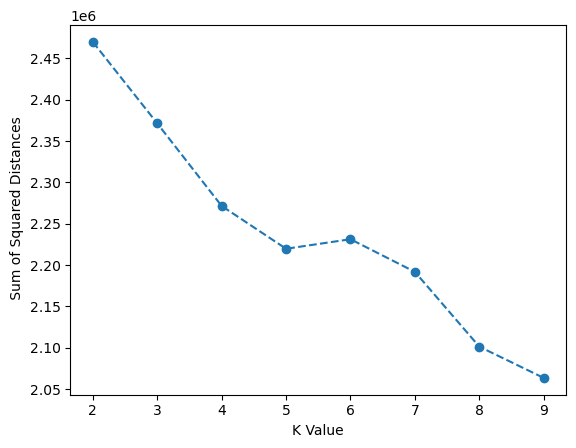

In [12]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

In [13]:
pd.Series(ssd).diff()

0             NaN
1   -98439.711408
2   -99849.240597
3   -51739.584108
4    11541.035079
5   -39489.521297
6   -90391.860316
7   -37783.215503
dtype: float64